In [68]:
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt
from WDM.code.utils.Meyer import Meyer
from WDM.code.utils.utils import C_nm 

In [126]:
dt = 0.25 

Nf = 16

N = 512

Nt = N//Nf

f_Ny = 1. / (2. * dt)

T = N*dt

times = np.arange(0, T, dt)

freqs = np.fft.fftfreq(N, d=dt)

q = 16
                
d = 4

A_frac = 0.25
B_frac = 1. - 2. * A_frac 

dF = 1. / ( 2. * dt * Nf )  
dOmega = 2. * np.pi * dF
dT = Nf * dt

A = A_frac * dOmega
B = B_frac * dOmega

K = 2 * q * Nf


In [141]:
Gnm = {}
gnm = {}

for n in range(Nt):
    Gnm[(n, 0)] = np.exp(-1j*n*4.*np.pi*freqs*dT) * Meyer(2.*np.pi*freqs, d, A, B)
    gnm[(n, 0)] = np.fft.ifft(Gnm[(n, 0)]).real / dt

    for m in range(1, Nf):
        Gnm[(n, m)] = (1/np.sqrt(2.)) * np.exp(-1j*n*2.*np.pi*freqs*dT) * ( 
                    C_nm(n, m) * Meyer(2.*np.pi*freqs-m*dOmega, d, A, B) +
                    np.conj(C_nm(n, m)) * Meyer(2.*np.pi*freqs+m*dOmega, d, A, B) 
                )
        
        gnm[(n, m)] = np.fft.ifft(Gnm[(n, m)]).real / dt

    Q = Nf%2
    Gnm[(n, Nf)] = np.exp(-1j*(2*n+Q)*2.*np.pi*freqs*dT) * ( 
                    Meyer(2.*np.pi*freqs+2.*np.pi*f_Ny, d, A, B) + 
                    Meyer(2.*np.pi*freqs-2.*np.pi*f_Ny, d, A, B)
    )
    gnm[(n, Nf)] = np.fft.ifft(Gnm[(n, Nf)]).real / dt

    

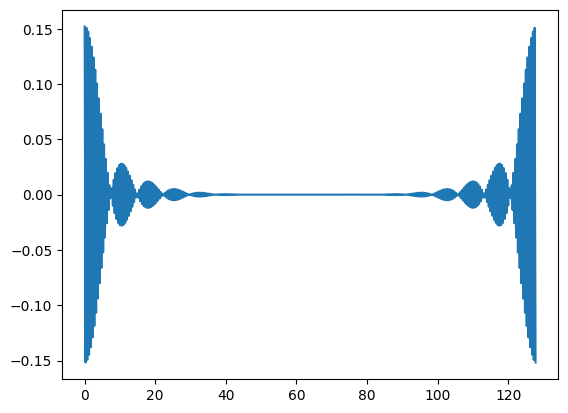

In [142]:
for n in [0]:
    plt.plot(times,  gnm[(n, Nf)])
plt.show()

In [143]:
np.sum(gnm[(2, 0)]*gnm[(2, 0)]*dt) * 2*np.pi

np.float32(0.9999999)

In [144]:
np.sum( np.abs(Gnm[(4,0)])**2 / T )* 2*np.pi

np.float32(0.9999999)

In [131]:
Nf*dt, dT

(4.0, 4.0)